In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#%% p.4 factorial
from math import factorial
factorial(10) #10!=10*9*8*...*2*1


3628800

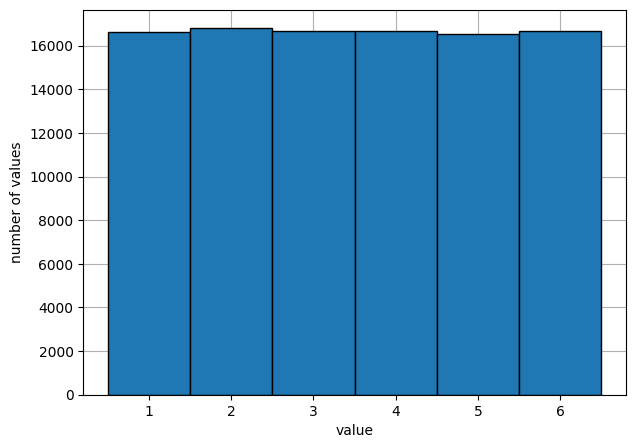

In [ ]:
#%% #randint=random integer
from numpy.random import randint
#randint(min,max,n) #n integers betwen min...max-1, 1D-array, (n,)
#randint(min,max,(m,n)) #mxn-matrix, (m,n)


X=randint(1,7,100000)

#histogram
bins=np.arange(0.5,7.5,1) #intervals
plt.figure(figsize=(7,5))
plt.hist(X,bins,width=1,edgecolor='k',zorder=2)
#heights of the bars = number of values on the intervals
#zorder=2-> grid lines behind the bars
plt.grid()
plt.ylabel('number of values')
plt.xlabel('value')
plt.show()

In [ ]:
#%% p.6, dice 6 times
N=100000 #number of simulation rounds
case1=0 #6 different numbers
case2=0 #no 6:s

for n in range(N):
  result=randint(1,7,6)
  different_numbers=np.unique(result) # = different elements in array result
  if different_numbers.size==6: #size = number of elements
    case1+=1

  if np.max(result)<=5:
    case2+=1

#exact probabilities
P1=factorial(6)/6**6
P2=5**6/6**6

print(P1)
print(case1/N)
print(P2)
print(case2/N)

0.015432098765432098
0.01484
0.33489797668038407
0.3335


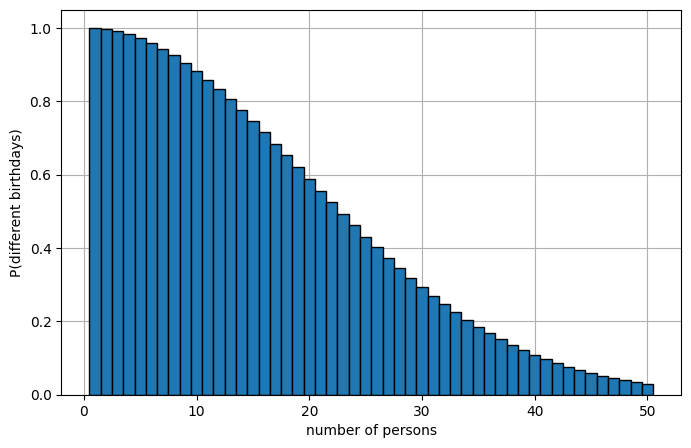

In [ ]:
#%% s.7, birthday problem
N=50 #max number of persons
p=np.zeros(N) #p[n] = P(n+1 persons have all different birthdays)
p[0]=365/365
for n in range(1,N):
  p[n]=p[n-1]*(365-n)/365

plt.figure(figsize=(8,5))
x=np.arange(1,N+1,1)
plt.bar(x,p,zorder=2,width=1,edgecolor='k') #zorder=2 ->grid-lines behind bars
plt.grid()
plt.xlabel('number of persons')
plt.ylabel('P(different birthdays)')
plt.show()

In [ ]:
#%% simulation
K=100000#simulation rounds
n=10 #number of persons
different=0
for k in range(K):
  sp=np.random.randint(1,366,n)
  birthdays=np.unique(sp) #different elements in birthdays
  if birthdays.size==n:
    different+=1

print(different/K)
print(p[n-1])

0.88325
0.8830518222889221


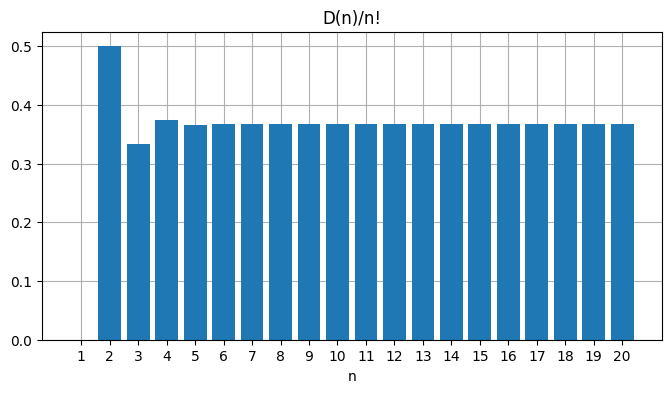

In [ ]:
#%% p.9, derangements
N=20
D=np.zeros(N) #D[n]=number of derangements of n+1 items
D[1]=1
p=np.zeros(N) #p[n]=D[n]/(n+1)! = fraction of derangements of all permutations
p[1]=D[1]/2
fact_n=2 #(n+1)!
for n in range(2,N):
  D[n]=n*(D[n-1]+D[n-2])
  fact_n*=n+1
  p[n]=D[n]/fact_n

x=np.arange(1,N+1)
plt.figure(figsize=(8,4))
plt.bar(x,p,zorder=2)
plt.grid()
plt.xticks(x)
plt.xlabel('n')
plt.title('D(n)/n!')
plt.show()

In [ ]:
#%%
from numpy.random import permutation
n=5
pn=permutation(n) #permutation of numbers 0,1,...,n-1
print(pn)
v=[2,4,7,6,10] #or v = np.array([2,4,7,6,10])
pv=permutation(v) #permutation of elements of  v
print(pv)

[0 4 1 3 2]
[ 4  7  6 10  2]


In [ ]:
#%% derangement simulation
#from numpy.random import permutation
n=15
original_order=np.arange(1,n+1)
K=100000
der=0 #number of derangements
for k in range(K):
  new_order=permutation(original_order)
  inplace = np.sum(original_order==new_order) #sum = number of True:s
  if inplace==0:
    der+=1

print(der/K)
print(p[n-1])


0.36629
0.3678794411713972


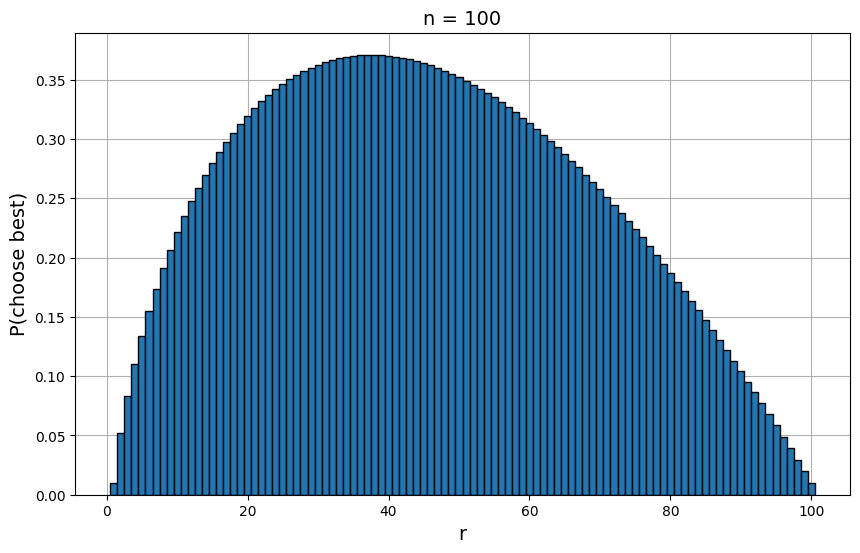

0.371042778712643
37


In [ ]:
#%% p.11, secretary problem
n=100
p=np.zeros(n) #p[r] = choose best (=0) with stopping strategy
#(interview r-1 first and choose first applicant r,r+1,.. that is beter than the best interviewed)
p[0]=1/n #choose first applicant, P(choose best)=1/n
for r in range(2,n+1):
    i=np.arange(r,n+1,1)
    p[r-1]=np.sum(1/n*(r-1)/(i-1))

plt.figure(figsize=(10,6))
plt.bar(np.arange(1,n+1),p,width=1,edgecolor='k',zorder=2)
plt.grid()
plt.xlabel('r',fontsize=14)
plt.ylabel('P(choose best)',fontsize=14)
plt.title('n = 100',fontsize=14)
plt.show()

print(np.max(p))
print(np.argmax(p))

In [ ]:
#%% simulation
from numpy.random import permutation
K=100000
r=20
best=0
for k in range(K):
    arrival_order=permutation(n)
    mr=np.min(arrival_order[:r-1]) #best of the r-1 first
    rest=arrival_order[r-1:]
    better=rest[rest<mr]
    if better.size>0:
        choice=better[0]
    else:
        choice=arrival_order[-1]
    if choice==0:
       best+=1

print(best/K)
print(p[r-1])

0.31885
0.31963119349422825


In [ ]:
#%% p.13, binomial coefficient
from scipy.special import comb
n=10
k=4
print(comb(n,k))

210.0


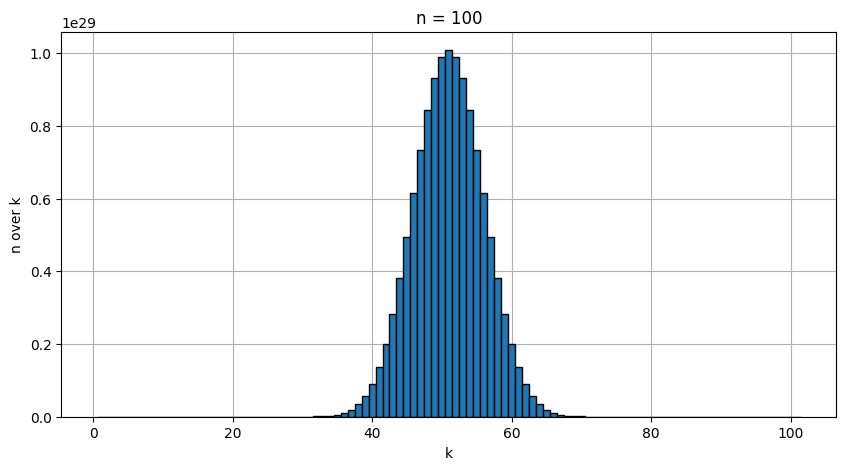

In [ ]:
#%%
n=100
n_over_k=np.zeros(n+1)
for k in range(n+1):
  n_over_k[k]=comb(n,k)

k=np.arange(1,n+2)
plt.figure(figsize=(10,5))
plt.bar(k,n_over_k,zorder=2,width=1,edgecolor='k') #tn saada k kruunaa
plt.grid()
plt.xlabel('k')
plt.ylabel('n over k')
plt.title('n = '+str(n))
plt.show()

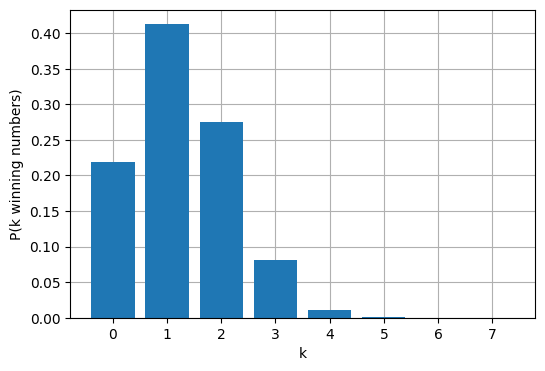

[2.18832962e-01 4.12415967e-01 2.74943978e-01 8.18285648e-02
 1.12866986e-02 6.77201916e-04 1.45634821e-05 6.50155449e-08]


In [ ]:
#%% p.19 lotto
p=np.zeros(8) #p[k] = P(k winning numbers), k=0,1,2,...,7
#from scipy.special import comb
for k in range(8):
  p[k]=comb(7,k)*comb(32,7-k)/comb(39,7)

x=np.arange(0,8)
plt.figure(figsize=(6,4))
plt.bar(x,p,zorder=2)
plt.grid()
plt.xlabel('k')
plt.ylabel('P(k winning numbers)')
plt.show()
print(p)

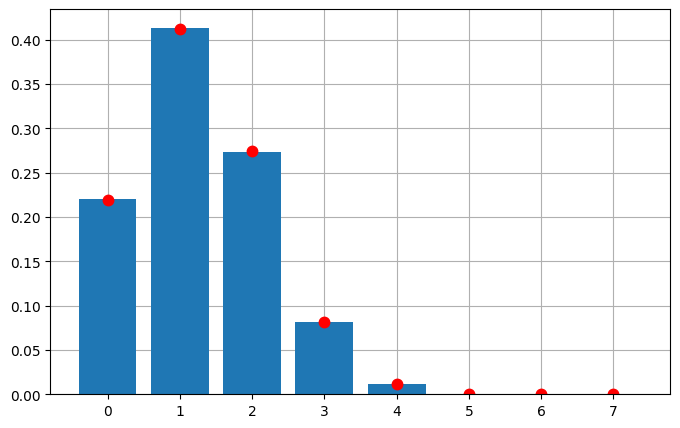

In [ ]:
#%% simulation
#from numpy.random import permutation
numbers=np.arange(1,40,1)

winning_numbers=permutation(numbers)[:7]
k_winning=np.zeros(8)
N=100000
for n in range(N):
  own_numbers=permutation(numbers)[:7]
  winning=np.intersect1d(own_numbers,winning_numbers)
  k=winning.size
  k_winning[k]+=1

plt.figure(figsize=(8,5))
x=np.arange(0,8,1)
plt.bar(x,k_winning/N,zorder=2)
plt.plot(x,p,'r.',markersize=15)
plt.grid()
plt.show()

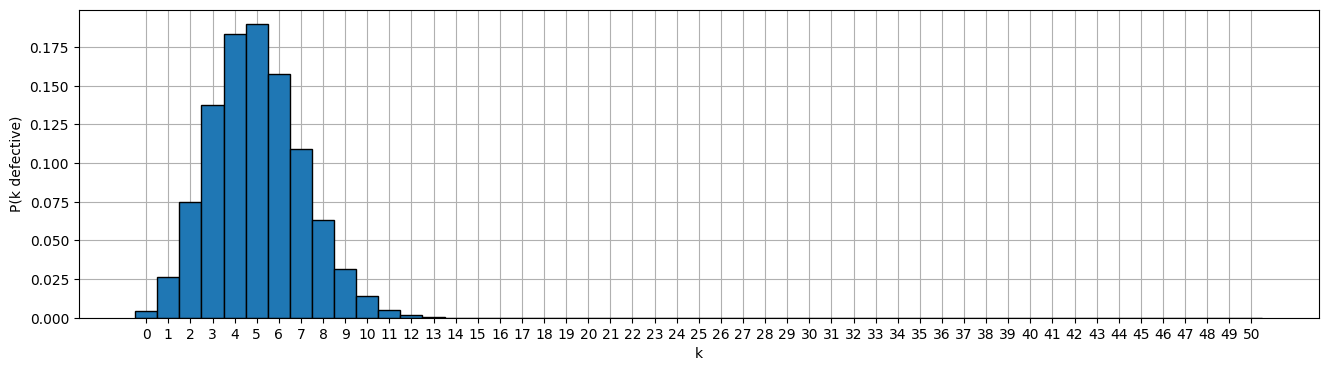

In [ ]:
#%% p.21 quality control

N=1000 #total number of items
M=100 #number of defectives
n=50 #sample size

p=np.zeros(n+1) #p[k] = P(k defective)
#from scipy.special import comb
for k in range(n+1):
  p[k]=comb(M,k)*comb(N-M,n-k)/comb(N,n)

x=np.arange(0,n+1)
plt.figure(figsize=(16,4))
plt.bar(x,p,zorder=2,width=1,edgecolor='k')
plt.grid()
plt.xticks(x)
plt.xlabel('k')
plt.ylabel('P(k defective)')
plt.show()

In [ ]:
#%% p.23, poker
numbers=np.arange(1,14)
numbers=np.hstack((numbers,numbers,numbers,numbers))
suit=np.ones(13)
suit=np.hstack((suit,2*suit,3*suit,4*suit))
deck=np.zeros((52,2))
deck[:,0]=numbers
deck[:,1]=suit

print(deck)

[[ 1.  1.]
 [ 2.  1.]
 [ 3.  1.]
 [ 4.  1.]
 [ 5.  1.]
 [ 6.  1.]
 [ 7.  1.]
 [ 8.  1.]
 [ 9.  1.]
 [10.  1.]
 [11.  1.]
 [12.  1.]
 [13.  1.]
 [ 1.  2.]
 [ 2.  2.]
 [ 3.  2.]
 [ 4.  2.]
 [ 5.  2.]
 [ 6.  2.]
 [ 7.  2.]
 [ 8.  2.]
 [ 9.  2.]
 [10.  2.]
 [11.  2.]
 [12.  2.]
 [13.  2.]
 [ 1.  3.]
 [ 2.  3.]
 [ 3.  3.]
 [ 4.  3.]
 [ 5.  3.]
 [ 6.  3.]
 [ 7.  3.]
 [ 8.  3.]
 [ 9.  3.]
 [10.  3.]
 [11.  3.]
 [12.  3.]
 [13.  3.]
 [ 1.  4.]
 [ 2.  4.]
 [ 3.  4.]
 [ 4.  4.]
 [ 5.  4.]
 [ 6.  4.]
 [ 7.  4.]
 [ 8.  4.]
 [ 9.  4.]
 [10.  4.]
 [11.  4.]
 [12.  4.]
 [13.  4.]]


In [ ]:
#%% simulation
N=100000
pair=0
two_pairs=0
three_same=0
full_house=0
four_same=0
flush=0
straight_flush=0
straight=0
rest=0


for n in range(N):
  #pick 5 cards
  ind=np.random.permutation(52)[:5]
  hand=deck[ind,:]
  #different numbers in hand
  numbers,count1=np.unique(hand[:,0],return_counts=True)
  #different suits in hand
  suits,count2=np.unique(hand[:,1],return_counts=True)

  #sort -> smallest ... largest
  maxnumber=np.sort(count1)[-1] #how many cards with most common number
  max2number=np.sort(count1)[-2] #how many cards with second most common number

  #differences of sorted numbers  (flush ?)
  hand_sorted=np.sort(hand[:,0])
  differences=hand_sorted[1:]-hand_sorted[:-1]

  if maxnumber==4:
    four_same+=1
  elif maxnumber==3 and max2number==1:
    three_same+=1
  elif maxnumber==3 and max2number==2:
    full_house +=1
  elif maxnumber==2 and max2number==1:
    pair+=1
  elif maxnumber==2 and max2number==2:
    two_pairs +=1
  elif np.max(differences)==1 and np.max(count2)<5:
    flush+=1
  elif np.max(differences)==1 and np.max(count2)==5:
    straight_flush+=1
  elif np.max(count2)==5:
    flush+=1
  else:
    rest+=1



In [ ]:
#%%
p_four_same=four_same/N
exact_four_same=624/2598960
p_three_same=three_same/N
exact_three_same=54912/2598960
p_pair=pair/N
exact_pair=1098240/2598960
p_two_pairs=two_pairs/N
exact_two_pairs=123552/2598960
p_full_house=full_house/N
exact_full_house=3744/2598960
p_flush=flush/N
exact_flush=(5148-36)/2598960
p_straight=straight/N
exact_straight=(9216-36)/2598960
p_straight_flush=straight_flush/N
exact_straight_flush=36/2598960
p_rest=rest/N
exact_rest=1303560/2598960

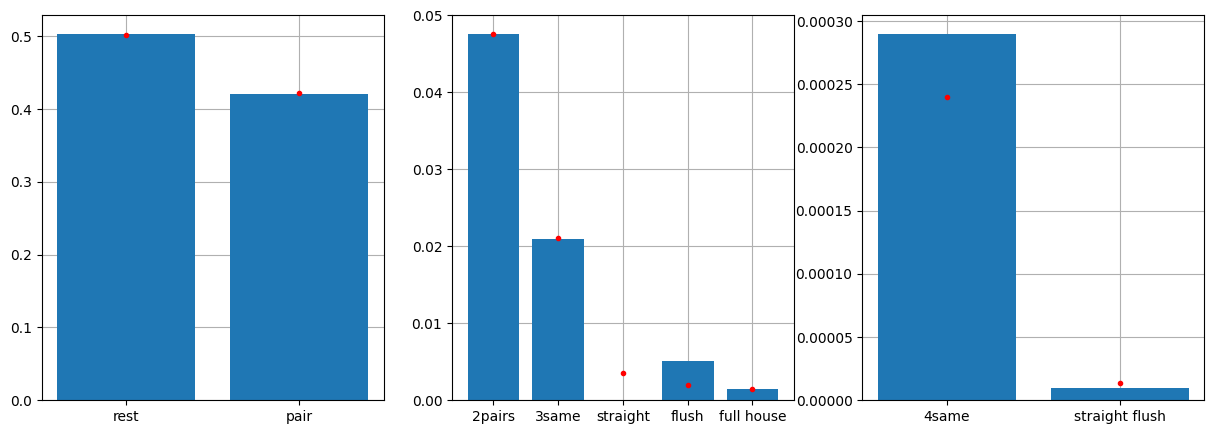

29
24.009603841536617
1
1.3851694523963431


In [ ]:
#%%
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.bar([1,2],[p_rest,p_pair],zorder=2)
plt.plot([1,2],[exact_rest,exact_pair],'r.')
plt.grid()
plt.xticks([1,2],labels=['rest','pair'])

plt.subplot(132)
plt.bar([1,2,3,4,5],[p_two_pairs,p_three_same,p_straight,p_flush,p_full_house],zorder=2)
plt.plot([1,2,3,4,5],[exact_two_pairs,exact_three_same,exact_straight,exact_flush,exact_full_house],'r.')
plt.grid()
plt.xticks([1,2,3,4,5],labels=['2pairs','3same','straight','flush','full house'])

plt.subplot(133)
plt.bar([1,2],[p_four_same,p_straight_flush],zorder=2)
plt.plot([1,2],[exact_four_same,exact_straight_flush],'r.')
plt.grid()
plt.xticks([1,2],labels=['4same','straight flush'])
plt.show()

print(four_same)
print(exact_four_same*N)
print(straight_flush)
print(exact_straight_flush*N)

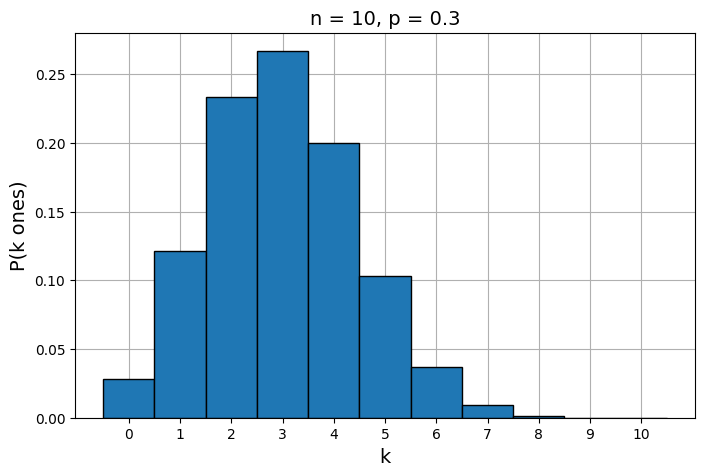

In [ ]:
#%% p.29 binomial distribution
n=10 #number of repeats
p=0.3 #P(result 1)
pk=np.zeros(n+1) #% p[k]=P(k ones)
#from scipy.special import comb
for k in range(n+1):
    pk[k]=comb(n,k)*p**k*(1-p)**(n-k)


plt.figure(figsize=(8,5))
k=np.arange(0,n+1)
plt.bar(k,pk,width=1,edgecolor='k',zorder=2)
plt.grid()
plt.xticks(k)
plt.xlabel('k',fontsize=14)
plt.ylabel('P(k ones)',fontsize=14)
plt.title('n = '+str(n)+', p = '+str(p),fontsize=14)
plt.show()

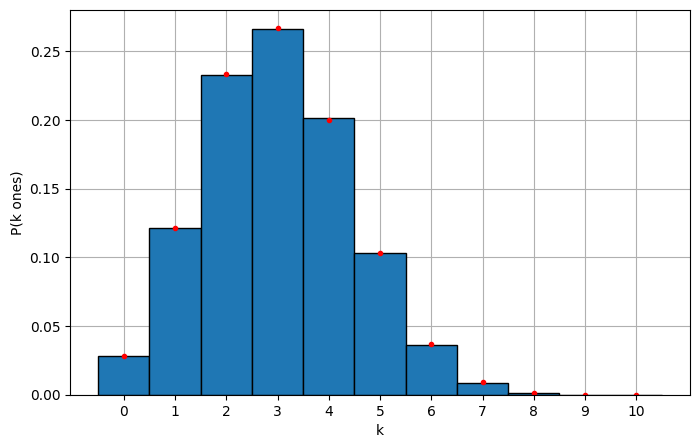

In [ ]:
#%% simulation

#idea: create a (uniformly distributed) random number from interval 0...1
#if it is <=p, then result = 1
#if it is >p, then result = 0

K=100000 #number of simulation rounds

k_ones=np.zeros(n+1) #rounds with k=0,1,2,...,n ones

for r in range(K):
    results=np.random.uniform(0,1,n)
    k=np.sum(results<=p)#number of ones
    k_ones[k]+=1

pk_simu=k_ones/K #P(k ones)

k=np.arange(0,n+1,1)
plt.figure(figsize=(8,5))
plt.bar(k,pk_simu,width=1,edgecolor='k',zorder=2)
plt.plot(k,pk,'r.')
plt.grid()
plt.xticks(k)
plt.xlabel('k')
plt.ylabel('P(k ones)')
plt.show()

In [ ]:
#%% p.35,  gambler's ruin
#p = P(A wins a game)
#m = number of coins of A at the start
#n = number of coins of B at the start
#gr(p,m,n) = P(A wins)
def gr(p,m,n):
    a=(1-p)/p
    if a==1: #p=0.5
        pm=m/(m+n)
    else:
        pm=(1-a**m)/(1-a**(m+n))
    return pm

p=0.4
m=10
n=10
print(gr(p,m,n))

0.01704592745492986


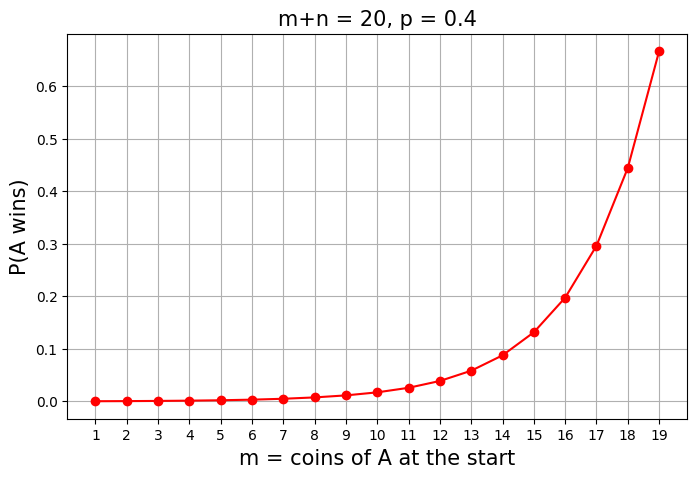

In [ ]:
#%% graph
N=20
m=np.arange(1,N,1)
n=N-m

pm=gr(p,m,n)

plt.figure(figsize=(8,5))
plt.plot(m,pm,'r.-',markersize=12)
plt.grid()
plt.xticks(n)
plt.xlabel('m = coins of A at the start',fontsize=15)
plt.ylabel('P(A wins)',fontsize=15)
plt.title('m+n = '+str(N)+', p = '+str(p),fontsize=15)
plt.show()

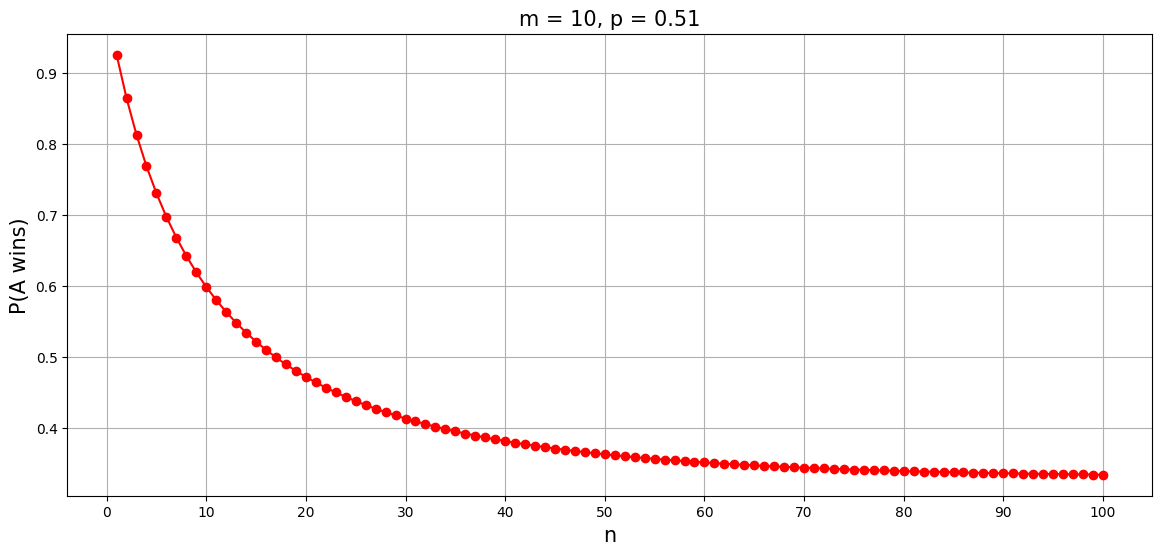

0.3297157119955805


In [ ]:
#%% game against the bank

p=0.51
m=10
nmax=100
n=np.arange(1,nmax+1,1)


pn=gr(p,m,n)

plt.figure(figsize=(14,6))
plt.plot(n,pn,'r.-',markersize=12)
plt.grid()
plt.xticks(np.arange(0,nmax+1,10))
plt.xlabel('n',fontsize=15)
plt.ylabel('P(A wins)',fontsize=15)
plt.title('m = '+str(m)+', p = '+str(p),fontsize=15)
plt.show()


alfa=(1-p)/p
print(1-alfa**m) #if p>0.5, then P(A wins) -> 1-alfa^m, as n increases

In [ ]:
#%% simulation
m=10
n=10
N=m+n
p=0.5
K=100000 #simulation rounds
kmax=1000 #max number of games in a round
games=np.zeros(K) #number of games in rounds
k0=2 #round to be collected
roundk0=np.zeros(kmax) #coins of A during round k0
Awins=0 #number of rounds A wins
for r in range(K):
    A=m
    B=n
    k=0
    while A>0 and B>0 and k<kmax:
        if r==k0:
          roundk0[k]=A

        game=np.random.uniform(0,1)
        if game<=p: #A wins
            A+=1
            B-=1
        else: #B wins
            A-=1
            B+=1

        k+=1

    if A==N:
        Awins+=1

    games[r]=k

    if r==k0:
      roundk0[k]=A
      roundk0=roundk0[:k+1]


print(Awins/K)
print(gr(p,m,n))
print(np.sum(games==kmax))
print(np.max(games))

0.4992
0.5
2
1000.0


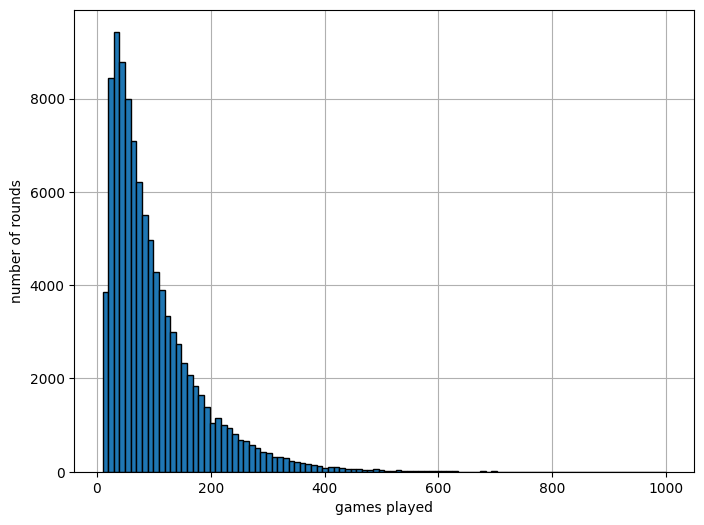

100.7535


In [ ]:
#%% distribution of games played in rounds

bins=np.arange(0.5,np.max(games)+1.5)
bins=100
plt.figure(figsize=(8,6))
plt.hist(games,bins,edgecolor='k',zorder=2)
plt.grid()
plt.xlabel('games played')
plt.ylabel('number of rounds')
plt.show()

print(np.mean(games))

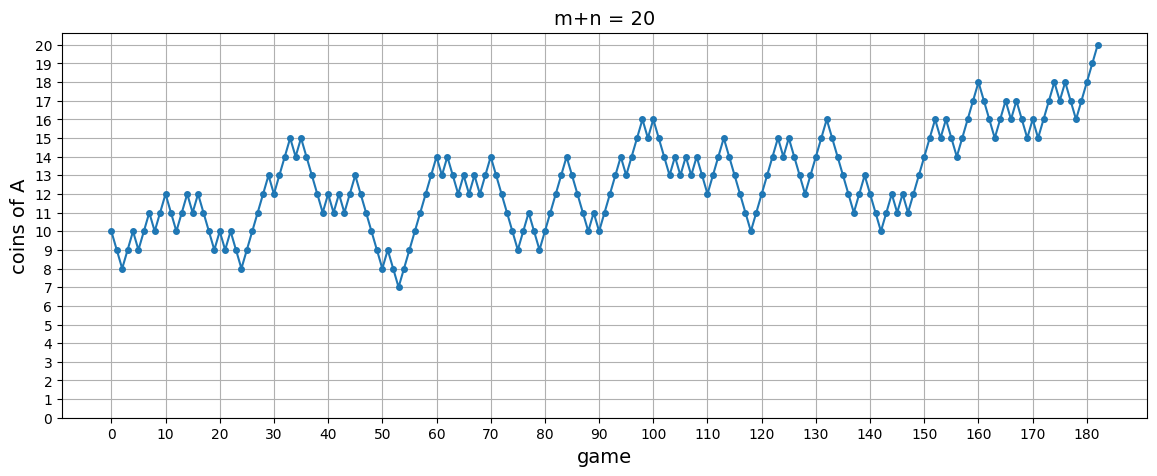

In [ ]:
#%% coins of A on round k0
plt.figure(figsize=(14,5))
plt.plot(roundk0,'.-',markersize=8)
plt.grid()
plt.xlabel('game',fontsize=14)
plt.ylabel('coins of A',fontsize=14)
plt.yticks(np.arange(0,N+1,1))
plt.xticks(np.arange(0,len(roundk0),10))
plt.title('m+n = '+str(N),fontsize=14)
plt.show()

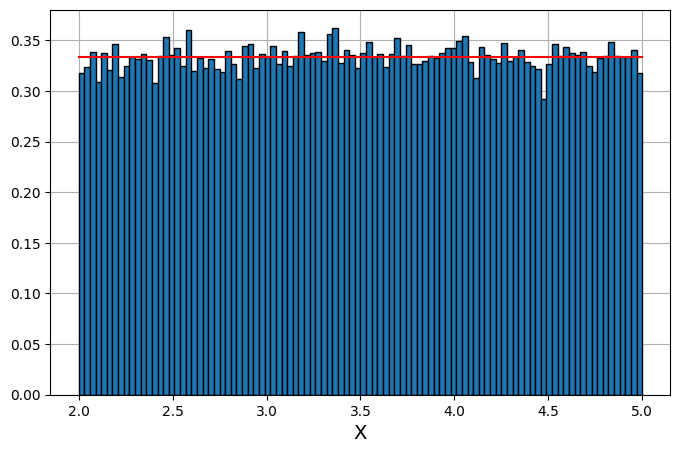

In [ ]:
#%% p.39 uniform distribution

n=100000
m=2
M=5
fx=1/(M-m) #pdf
X=np.random.uniform(m,M,n)  #n  uniformly distributed numbers from interval m...M
plt.figure(figsize=(8,5))
plt.hist(X,bins=100,density=True,edgecolor='k',zorder=2)
#density = True -> area of bar = fraction of values on the interval of the bar
#density = False -> height of the bar = number of values on the interval of the bar
plt.plot([m,M],[fx,fx],'r')
plt.grid()
plt.xlabel('X',fontsize=14)
plt.show()

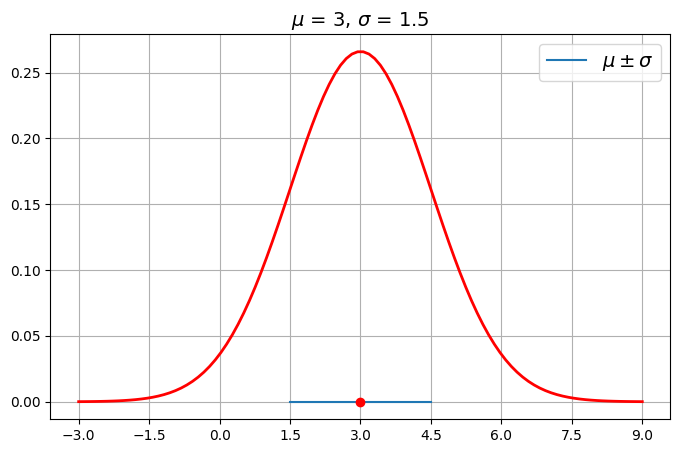

In [ ]:
#%% p.41 , normal distribution
mu=3 #mean
sigma=1.5 #standard deviation

#Gaussian
x=np.linspace(mu-4*sigma,mu+4*sigma,100)
f=1/(np.sqrt(2*np.pi)*sigma)*np.exp(-1/2*((x-mu)/sigma)**2)

plt.figure(figsize=(8,5))
plt.plot(x,f,'r',linewidth=2)
plt.plot([mu-sigma,mu+sigma],[0,0],label='$\mu\pm \sigma$')
plt.plot(mu,0,'ro')
plt.grid()
plt.xticks(np.arange(mu-4*sigma,mu+5*sigma,sigma))
plt.title('$\mu$ = '+str(mu)+', $\sigma$ = '+str(sigma),
          fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [ ]:
#%% p.45, critical value
from scipy.stats import norm
alfa=0.05
z_alfa=norm.ppf(1-alfa) #percent point function, P(X<=mu+z_alfa*sigma)=1-alfa
print(z_alfa)
Pz_alfa=norm.cdf(z_alfa) #cumulative distribution function, P(X<=mu+z_alfa*sigma)
print(Pz_alfa)

1.6448536269514722
0.95


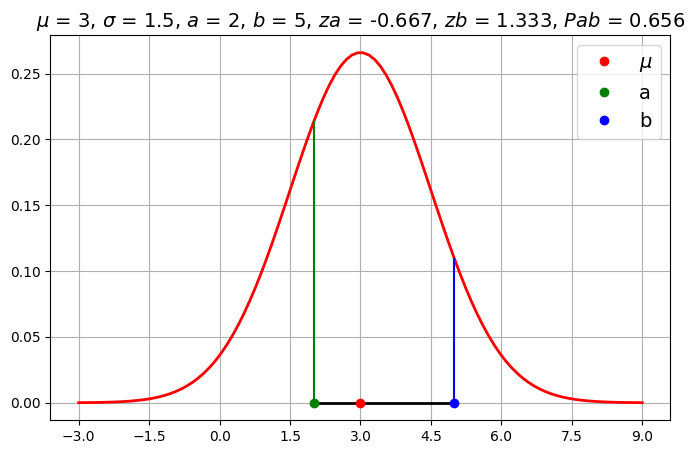

In [ ]:
#%% P(X between a...b)
mu=3
sigma=1.5
a=2
b=5
za=(a-mu)/sigma #a=mu+za*sigma
Pa=norm.cdf(za) #P(X<=a)
zb=(b-mu)/sigma #b=mu+zb*sigma
Pb=norm.cdf(zb) #P(X<=b)
Pab=Pb-Pa #P(X between a...b)

#Gaussian
x=np.linspace(mu-4*sigma,mu+4*sigma,100)
f=1/(np.sqrt(2*np.pi)*sigma)*np.exp(-1/2*((x-mu)/sigma)**2)
fa=1/(np.sqrt(2*np.pi)*sigma)*np.exp(-1/2*((a-mu)/sigma)**2)
fb=1/(np.sqrt(2*np.pi)*sigma)*np.exp(-1/2*((b-mu)/sigma)**2)


plt.figure(figsize=(8,5))
plt.plot(x,f,'r',lw=2)
plt.plot([a,b],[0,0],'k',lw=2)
plt.plot([a,a],[0,fa],'g')
plt.plot([b,b],[0,fb],'b')
plt.plot(mu,0,'ro',label='$\mu$')
plt.plot(a,0,'go',label='a')
plt.plot(b,0,'bo',label='b')

plt.grid()
plt.xticks(np.arange(mu-4*sigma,mu+5*sigma,sigma))
plt.title('$\mu$ = '+str(mu)+', $\sigma$ = '+str(sigma)+
          ', $a$ = '+str(a)+', $b$ = '+str(b)+
          ', $za$ = {:.3f}'.format(za)+
          ', $zb$ = {:.3f}'.format(zb)+
          ', $Pab$ = {:.3f}'.format(Pab),
          fontsize=14)
plt.legend(fontsize=14)
plt.show()

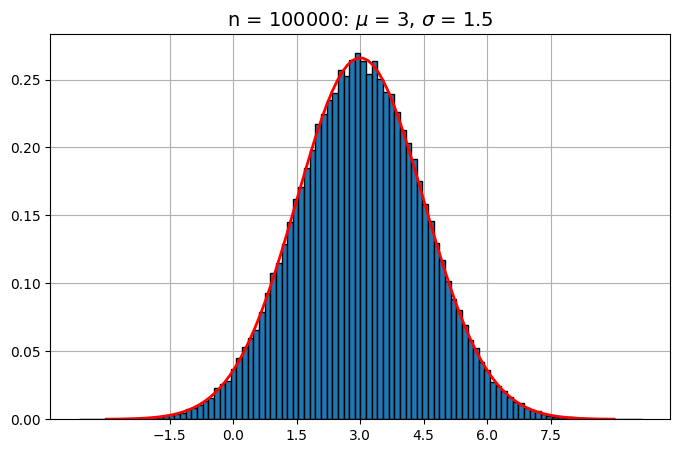

3.0024373326409397
1.4988627995750994
0.65727
0.6562962427272092


In [ ]:
#%% simulation

n=100000
X=np.random.normal(mu,sigma,n) #n  N(mu,sigma^2)-distributed numbers

plt.figure(figsize=(8,5))
plt.hist(X,bins=100,density=True,edgecolor='k',zorder=2)
plt.plot(x,f,'r',lw=2)
plt.grid()
plt.xticks(np.linspace(mu-3*sigma,mu+3*sigma,7))
plt.title('n = '+str(n)+
          ': $\mu$ = '+str(mu)+', $\sigma$ = '+str(sigma),
          fontsize=14)
plt.show()


print(np.mean(X))
print(np.std(X))
#P(X between a..b)
print(np.sum((X>=a)&(X<=b))/n)
print(Pab)


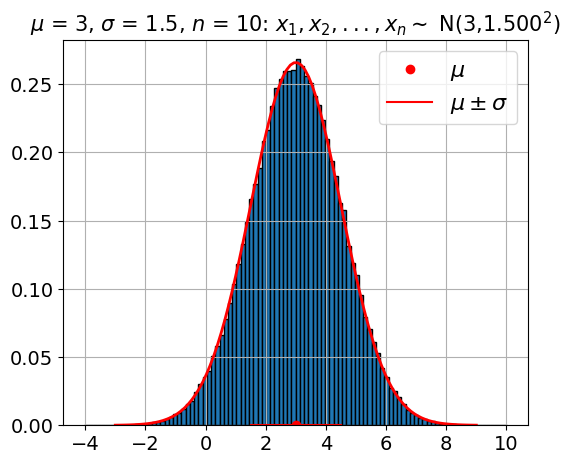

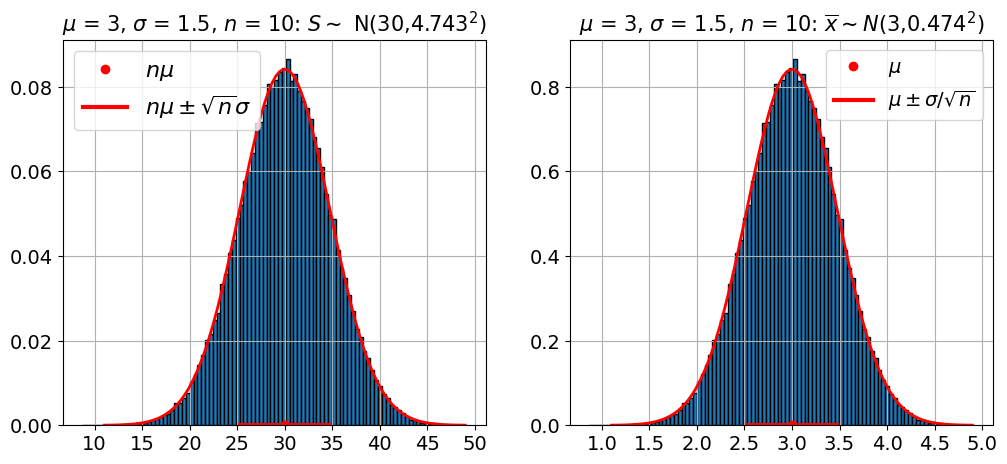

In [ ]:
#%% p.49, sum and average of normally distributed numbers
#Gaussian
def gk(mu,sigma,x):
    f=1/(np.sqrt(2*np.pi)*sigma)*np.exp(-1/2*((x-mu)/sigma)**2)
    return f

mu=3
sigma=1.5
n=10
N=100000
X=np.random.normal(mu,sigma,(N,n)) #(N,n)-matrix, x1,x2,...,xn as rows
S=np.sum(X,axis=1) #sums
M=np.mean(X,axis=1) #means

#x1,x2,...,xn~N(mu,sigma^2)
x=np.linspace(mu-4*sigma,mu+4*sigma,100)
f=gk(mu,sigma,x)

#sums S~N(muS,sigmaS^2)
muS=n*mu
sigmaS=np.sqrt(n)*sigma
xS=np.linspace(muS-4*sigmaS,muS+4*sigmaS,100)
fS=gk(muS,sigmaS,xS)

#means M~(muM,sigmaM^2)
muM=mu
sigmaM=sigma/np.sqrt(n)
xM=np.linspace(muM-4*sigmaM,muM+4*sigmaM,100)
fM=gk(muM,sigmaM,xM)

plt.figure(figsize=(6,5))
plt.hist(X[:,0],bins=100,density=True,edgecolor='k')
plt.plot(x,f,'r',linewidth=2)
plt.plot(mu,0,'ro',label='$\mu$')
plt.plot([mu-sigma,mu+sigma],[0,0],'r',label='$\mu\pm \sigma$')
plt.grid()
plt.title('$\mu$ = '+str(mu)+
          ', $\sigma$ = '+str(sigma)+
          ', $n$ = '+str(n)+': $x_1,x_2,...,x_n\sim$ N('
          +str(mu)+',{:.3f}'.format(sigma)+'$^2$)',
          fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)



plt.figure(figsize=(12,5))
plt.subplot(121)
plt.hist(S,bins=100,density=True,edgecolor='k')
plt.plot(xS,fS,'r',linewidth=2)
plt.plot(muS,0,'ro',label='$n\mu$')
plt.plot([muS-sigmaS,muS+sigmaS],[0,0],'r',lw=3,label='$n\mu\pm \sqrt{n}\sigma$')
plt.grid()
plt.title('$\mu$ = '+str(mu)+
          ', $\sigma$ = '+str(sigma)+
          ', $n$ = '+str(n)+': $S\sim$ N('
          +str(muS)+',{:.3f}'.format(sigmaS)+'$^2$)',
          fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16)

plt.subplot(122)
plt.hist(M,bins=100,density=True,edgecolor='k')
plt.plot(xM,fM,'r',linewidth=2)
plt.plot(muM,0,'ro',label='$\mu$')
plt.plot([muM-sigmaM,muM+sigmaM],[0,0],'r',lw=3,label='$\mu\pm \sigma/\sqrt{n}$')
plt.grid()
plt.title('$\mu$ = '+str(mu)+
          ', $\sigma$ = '+str(sigma)+
          ', $n$ = '+str(n)+
          r': $\overline{{x}}\sim N($'+str(muM)+
          ',{:.3f}'.format(sigmaM)+'$^2$)',fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [ ]:
#%% p.59,  confidence intervals
N=100000 #number of samples
n=100 #sample size
mu=2 #mean
sigma=1.5 #standard deviation
X=np.random.normal(mu,sigma,(N,n)) #samples as rows
muX=np.mean(X,axis=1) #sample averages
sX=np.std(X,ddof=1,axis=1) #sample standard deviations


#critical values of t- and chi2-distributions
from scipy.stats import t,chi2
dof=n-1 # degrees of freedom


#(1-alfa)*100 % confidence intervals
alfa=0.05 #confidence level

#critical value of t-distribution
tk=t.ppf(1-alfa/2,dof)
print('tk ='+str(tk))

#critical values of chi2-distribution
chi2_left=chi2.ppf(1-alfa/2, dof)
chi2_right=chi2.ppf(alfa/2, dof)

print('chi2_left = '+str(chi2_left))
print('chi2_right = '+str(chi2_right)+'\n')

# confidence intervals
mu_left=muX-tk*sX/np.sqrt(n)
mu_right=muX+tk*sX/np.sqrt(n)

sigma_left=np.sqrt((n-1)/chi2_left)*sX
sigma_right=np.sqrt((n-1)/chi2_right)*sX

#fraction of confidence intervals containing mu and sigma
mu_ok=np.sum((mu>=mu_left)&(mu<=mu_right))/N
sigma_ok=np.sum((sigma>=sigma_left)&(sigma<=sigma_right) )/N

print(mu_ok)
print(sigma_ok)

tk =1.9842169515086827
chi2_left = 128.4219886438403
chi2_right = 73.36108019128368

0.94962
0.94925


In [ ]:
#%% confidence intervals number k
k=7
print(muX[k])
print(sX[k])
print([mu_left[k],mu_right[k]])
print([sigma_left[k],sigma_right[k]])


2.018220639211835
1.3447676004195777
[1.751389572352617, 2.285051706071053]
[1.1807151586457263, 1.5621832455293478]


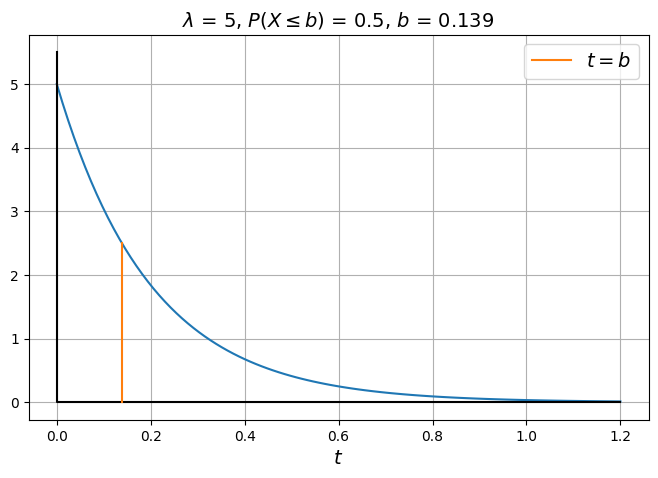

In [ ]:
#%% p.61 eksponential distribution
la=5
tmax=6/la
t=np.linspace(0,tmax,100)
f=la*np.exp(-la*t)
#P(X<=b)=p
p=0.5
b=-np.log(1-p)/la
fb=la*np.exp(-la*b)

plt.figure(figsize=(8,5))
plt.plot(t,f)
plt.plot([0,0,tmax],[1.1*la,0,0],'k')
plt.plot([b,b],[0,fb],label='$t = b$')
plt.grid()
plt.title('$\lambda$ = '+str(la)+', $P(X\leq b)$ = '+str(p)
          +', $b$ = {:.3f}'.format(b),
          fontsize=14)
plt.legend(fontsize=14)
plt.xlabel('$t$',fontsize=14)
plt.show()

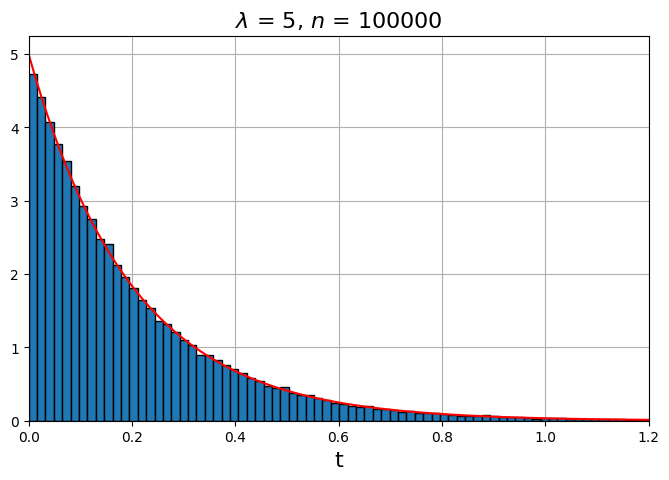

In [ ]:
#%% simulation

n=100000
X=np.random.exponential(1/la,n) #n  Exp(la)-distributed numbers


plt.figure(figsize=(8,5))
plt.hist(X,150,density=True,edgecolor='k',zorder=2)
plt.plot(t,f,'r')
plt.grid()
plt.xlim(0,tmax)
plt.title('$\lambda$ = '+str(la)+', $n$ = '+str(n),fontsize=16)
plt.xlabel('t',fontsize=16)
plt.show()

In [ ]:
#%% P(X<=b)
print(np.sum(X<=b)/n)
print(1-np.exp(-la*b))

0.49855
0.5


In [ ]:
#%% p.60
print(np.mean(X))
print(np.std(X))
print(1/la)

0.2004118646814478
0.20090216394221166
0.2


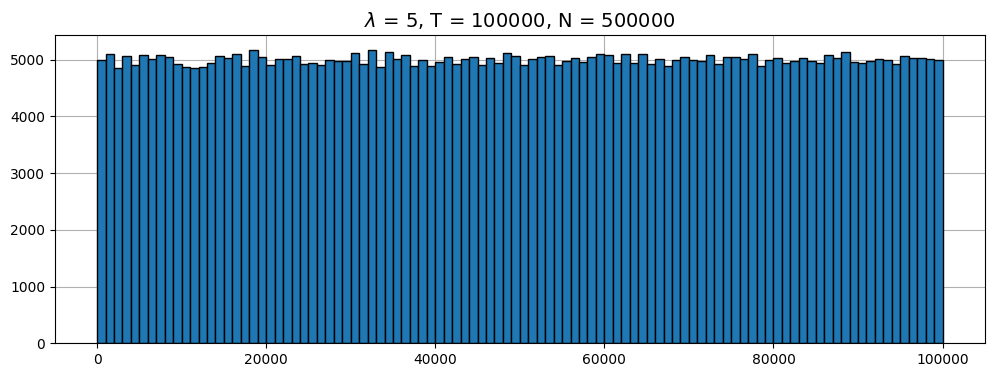

In [ ]:
#%% p.65

la=5 #average number of arrivals in unit time interval
T=100000 #number of unit time intervals
N=la*T #total number of arrivals

arrivals=np.random.uniform(0,T,N) #N uniformly distributed arrival times between 0...T

plt.figure(figsize=(12,4))
plt.hist(arrivals,bins=100,edgecolor='k',zorder=2)
plt.grid()
plt.title('$\lambda$ = '+str(la)+', T = '+str(T)+', N = '+str(N),
          fontsize=14)
plt.show()

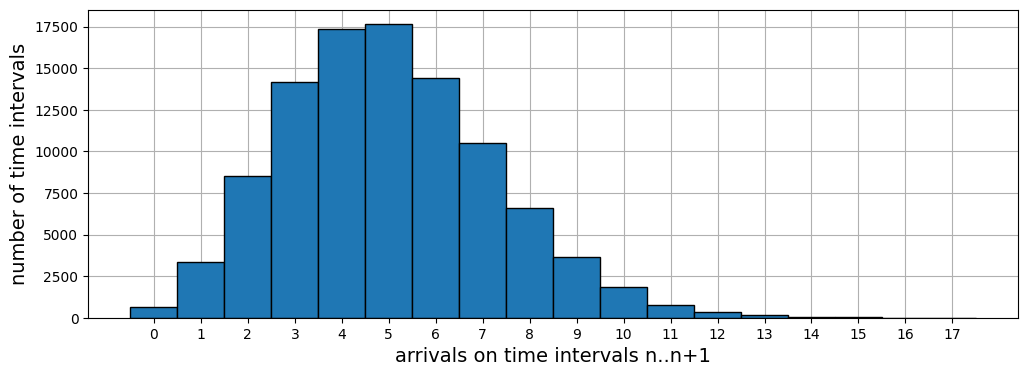

In [ ]:
#%% arrival times on intervals n...n+1, n=0,1,2,...

bins1=np.arange(0,T+1,1) #intervals
counts1,_ = np.histogram(arrivals,bins1) #number of arrivals on intervals
maxk=np.max(counts1)

bins2=np.arange(-0.5,maxk+1,1) #number of arrivals on intervals
counts2,_ = np.histogram(counts1,bins2) #number of intervals with 0,1,...,maxk arrivals


plt.figure(figsize=(12,4))
plt.bar(bins2[:-1],counts2,align='edge',width=1,edgecolor='k',zorder=2)
plt.xticks(np.arange(0,maxk+1,1))
plt.grid()
plt.xlabel('arrivals on time intervals n..n+1',fontsize=14)
plt.ylabel('number of time intervals',fontsize=14)
plt.show()

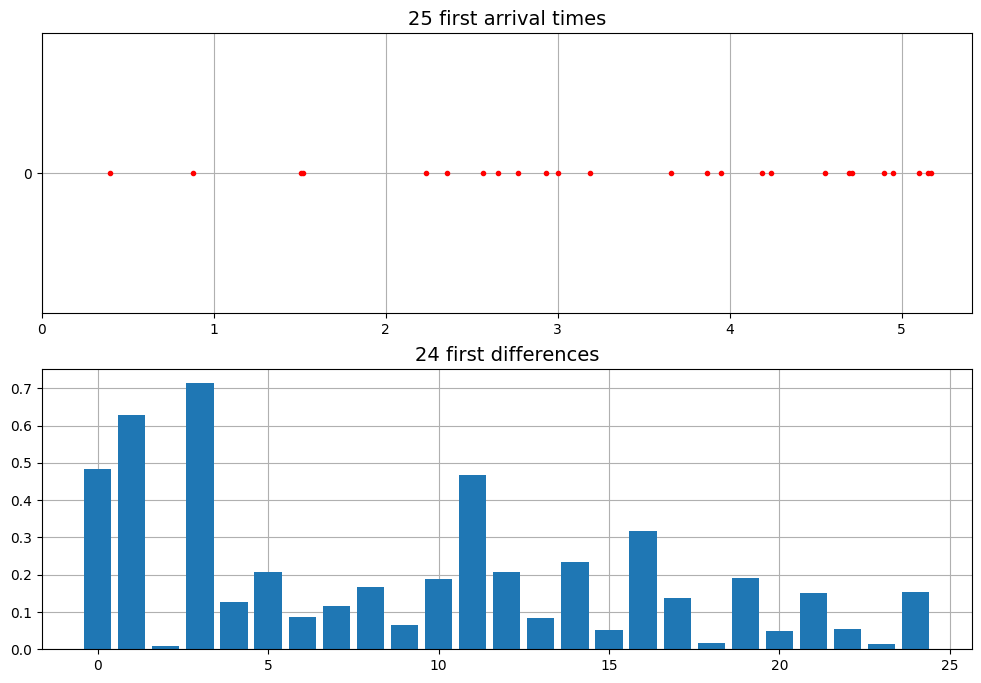

In [ ]:
#%%
arrivals_sorted=np.sort(arrivals) #smallest->largest

#n first differences
n=25


plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(arrivals_sorted[:n],np.zeros(n),'r.')
plt.yticks([0])
plt.grid()
plt.title(str(n)+' first arrival times',fontsize=14)
plt.xticks(np.arange(0,arrivals_sorted[n],1))

differences=arrivals_sorted[1:]-arrivals_sorted[:-1]

plt.subplot(212)
plt.bar(np.arange(0,n,1),differences[:n],zorder=2)
plt.grid()
plt.title(str(n-1)+' first differences',fontsize=14)
plt.show()


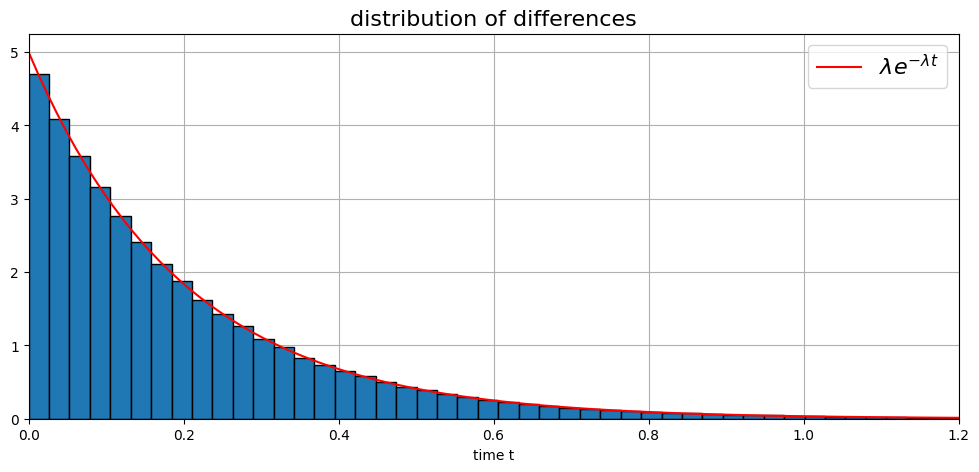

In [ ]:
#%% distribution of differences
tmax=6/la
tt=np.linspace(0,tmax,100)
f=la*np.exp(-la*tt)

plt.figure(figsize=(12,5))
plt.hist(differences,bins=100,density=True,edgecolor='k',zorder=2)
plt.plot(tt,f,'r',label='$\lambda e^{-\lambda t}$')
plt.grid()
plt.xlim(0,tmax)
plt.title('distribution of differences',fontsize=16)
plt.legend(fontsize=16)
plt.xlabel('time t')
plt.show()

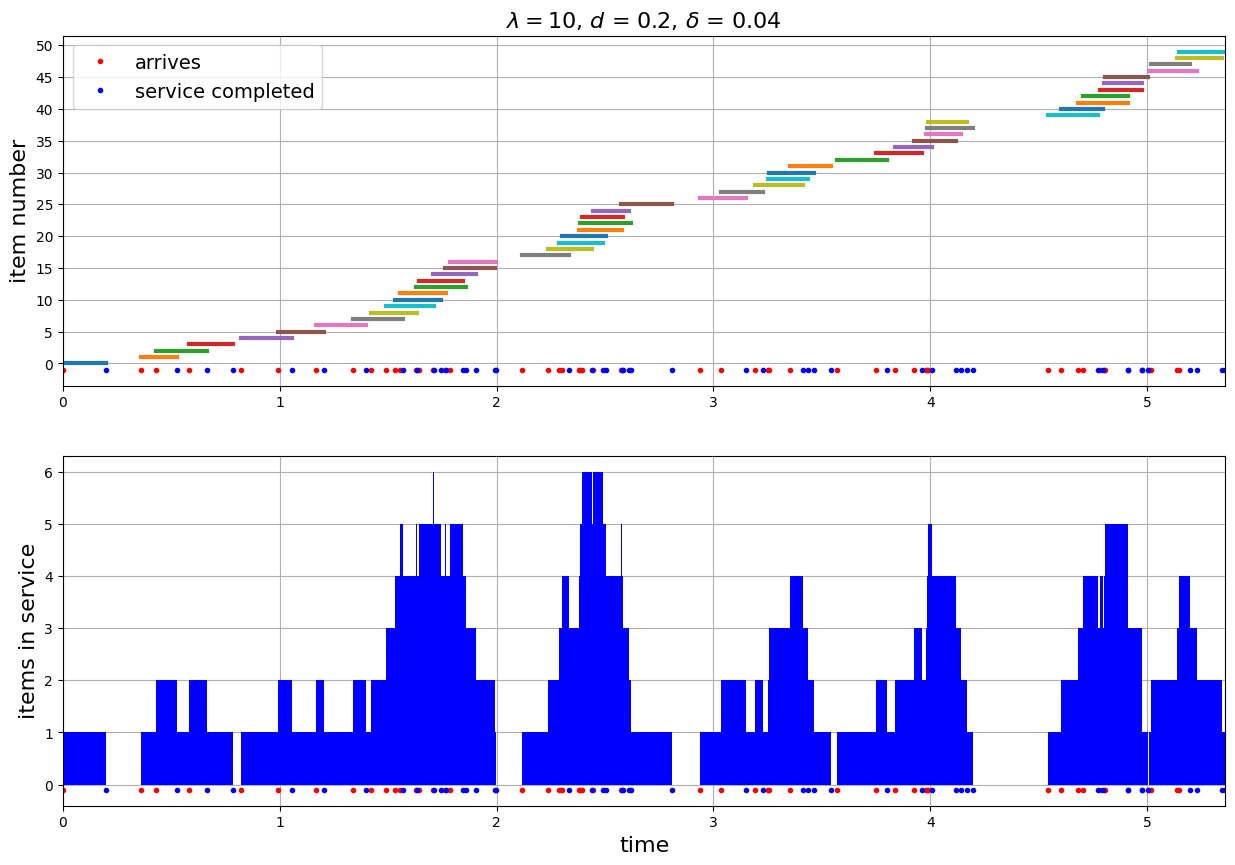

In [ ]:
#%% p.67
n=50 #number of items
la=10 #average number of arrivals in unit time interval

td=np.random.exponential(1/la,n) #Exp(la)-distributed arrival time differences

#service times, uniformly distributed between d-delta ... d+delta
d=0.2
delta=d/5
m=d-delta
M=d+delta
ts=np.random.uniform(m,M,n)

ta=np.zeros(n) #arrival times
tsc=np.zeros(n) #service completed times
tsc[0]=ta[0]+ts[0]
for k in range(n-1):
    ta[k+1]=ta[k]+td[k]
    tsc[k+1]=ta[k+1]+ts[k+1]



# number of items in service
tasc=np.hstack((ta,tsc)) #arrival and service completed times
asc=np.hstack((np.zeros(n),np.ones(n))) #0 = arrives, 1 = service completed
tascs=np.sort(tasc) #smallest->largest
ind=np.argsort(tasc) #corresponding indices
asct=asc[ind] #arrivals and service completions in time order
nis=np.zeros(2*n-1) #number of items in service between asct time-intervals
nisp=0 #previous number of items in service
for k in range(2*n-1):
    if asct[k]==0:
        nis[k]=nisp+1 #arrival
    else:
        nis[k]=nisp-1 #service completed
    nisp=nis[k]


plt.figure(figsize=(15,10))
plt.subplot(211)
for k in range(n):
    plt.plot([ta[k],tsc[k]],[k,k],lw=3)
plt.plot(ta,-np.ones(n),'r.',label='arrives')
plt.plot(tsc,-np.ones(n),'b.',label='service completed')
plt.xlim(0,tascs[-1])
plt.grid()
plt.legend(fontsize=14)
plt.title('$\lambda = $'+str(la)+r', $d$ = '+str(d)
          +', $\delta$ = '
          +str(delta),fontsize=16)
plt.yticks(np.arange(0,n+1,5))
plt.ylabel('item number',fontsize=16)

plt.subplot(212)

plt.bar(tascs[:-1],nis,zorder=2,facecolor='b',
        align='edge', #tolppien vasen reuna tsps[:-1]:ssä
        width=tascs[1:]-tascs[:-1]) #tolppien leveydet
plt.plot(ta,-0.1+np.zeros(n),'r.',label='start')
plt.plot(tsc,-0.1+np.zeros(n),'b.',label='end')
plt.grid()
plt.xlim(0,tascs[-1])
plt.yticks(np.arange(0,np.max(nis)+1,1))
plt.ylabel('items in service',fontsize=16)
plt.xlabel('time',fontsize=16)
plt.show()

In [ ]:
#%% time intervals, when 0 items in service
t0_end=tascs[1:][nis==0]
t0_start=tascs[:-1][nis==0]
zero=np.sum(t0_end-t0_start) #time when 0 items at service
print(zero)
maxk=np.max(nis) #max number of items at service
print(maxk)
total_time=tascs[-1] #total service time
print(total_time)
mean_in_service=np.sum((tascs[1:]-tascs[:-1])*nis)/total_time #average number of items in service
print(mean_in_service)

0.8319396039133221
6.0
5.360736220040994
1.9251278869024797


In [ ]:
#%% p.69, simulate K rounds

K=100000


zero=np.zeros(K) #times when 0 items at service
maxk=np.zeros(K) #max numbers of items at service
total_time=np.zeros(K) #total service times
mean_in_service=np.zeros(K) #average number of items in service


for r in range(K):
    td=np.random.exponential(1/la,n) #Exp(la)-distributed arrival time differences
    ts=np.random.uniform(m,M,n) #uniformly distributed service times between d-delta ... d+delta
    ta=np.zeros(n) #arrival times
    tsc=np.zeros(n) #service completed times
    tsc[0]=ta[0]+ts[0]
    for k in range(n-1):
        ta[k+1]=ta[k]+td[k]
        tsc[k+1]=ta[k+1]+ts[k+1]
    # number of items in service
    tasc=np.hstack((ta,tsc)) #arrival and service completed times
    asc=np.hstack((np.zeros(n),np.ones(n))) #0 = arrives, 1 = service completed
    tascs=np.sort(tasc) #smallest->largest
    ind=np.argsort(tasc) #corresponding indices
    asct=asc[ind] #arrivals and service completions in time order
    nis=np.zeros(2*n-1) #number of items in service between asct time-intervals
    nisp=0 #previous number of items in service
    for k in range(2*n-1):
        if asct[k]==0:
            nis[k]=nisp+1 #arrival
        else:
            nis[k]=nisp-1 #service completed
        nisp=nis[k]
    #aikavälit, jolloin käsittelyssä 0 nippeliä
    t0_end=tascs[1:][nis==0]
    t0_start=tascs[:-1][nis==0]
    zero[r]=np.sum(t0_end-t0_start) #time when 0 items at service
    maxk[r]=np.max(nis) #max number of items at service
    total_time[r]=tascs[-1] #total service time
    mean_in_service[r]=np.sum((tascs[1:]-tascs[:-1])*nis)/total_time[r] #average number of items in service


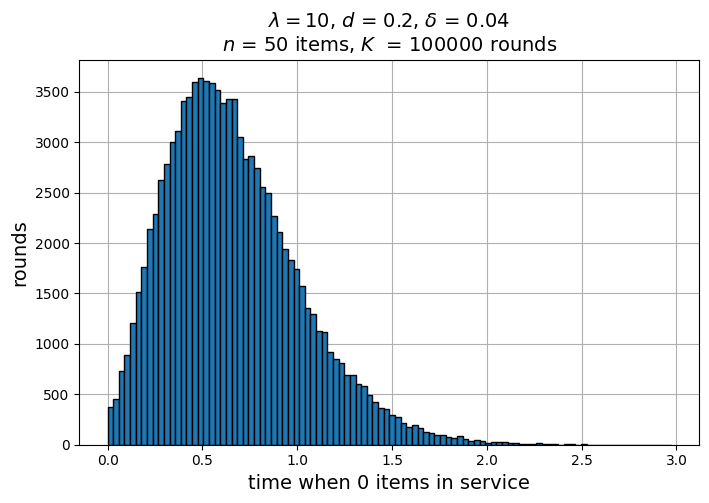

In [ ]:
#%%
plt.figure(figsize=(8,5))
plt.hist(zero,bins=100,density=False,zorder=2,edgecolor='k')
plt.grid()
plt.title('$\lambda = $'+str(la)+r', $d$ = '+str(d)+', $\delta$ = '
          +str(delta)+'\n'+
          '$n$ = '+str(n)+' items, $K$  = '+str(K)+' rounds',fontsize=14)

plt.xlabel('time when 0 items in service',fontsize=14)
plt.ylabel('rounds',fontsize=14)
plt.show()

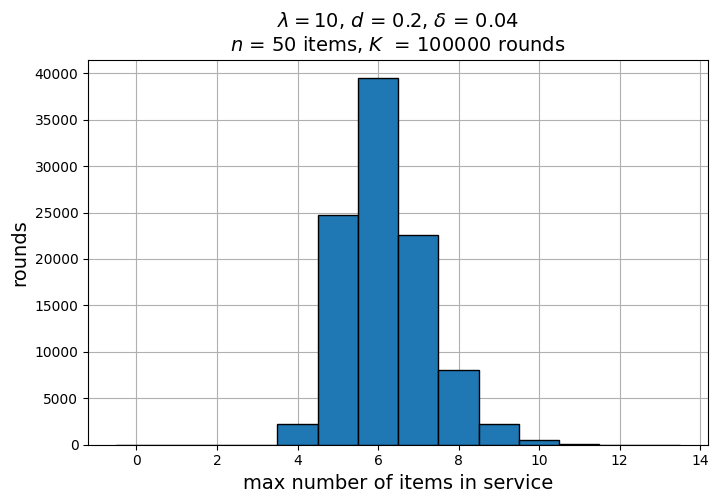

In [ ]:
#%%
kmax=np.max(maxk)
bins=np.arange(-0.5,kmax+0.5,1)
plt.figure(figsize=(8,5))
plt.hist(maxk,bins,align='mid',density=False,zorder=2,edgecolor='k',width=1)
plt.grid()
plt.title('$\lambda = $'+str(la)+r', $d$ = '+str(d)+', $\delta$ = '
          +str(delta)+'\n'+
          '$n$ = '+str(n)+' items, $K$  = '+str(K)+' rounds',fontsize=14)

plt.xlabel('max number of items in service',fontsize=14)
plt.ylabel('rounds',fontsize=14)
plt.show()

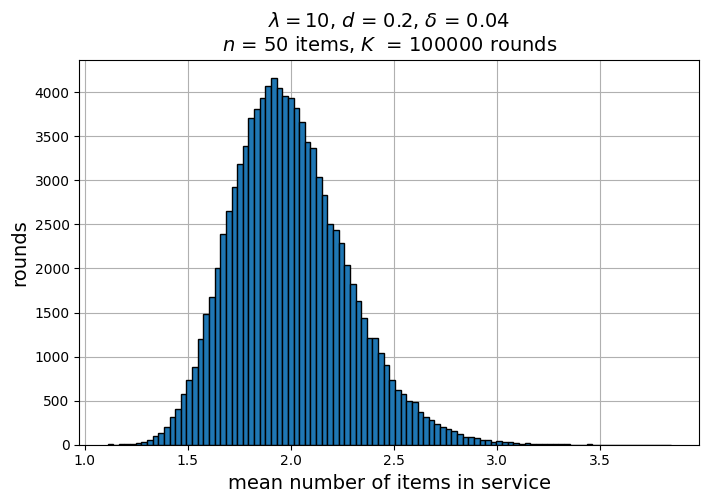

In [ ]:
#%%
kmax=np.max(maxk)
bins=np.arange(-0.5,kmax+0.5,1)
plt.figure(figsize=(8,5))
plt.hist(mean_in_service,bins=100,density=False,zorder=2,edgecolor='k')
plt.grid()
plt.title('$\lambda = $'+str(la)+r', $d$ = '+str(d)+', $\delta$ = '
          +str(delta)+'\n'+
          '$n$ = '+str(n)+' items, $K$  = '+str(K)+' rounds',fontsize=14)

plt.xlabel('mean number of items in service',fontsize=14)
plt.ylabel('rounds',fontsize=14)
plt.show()

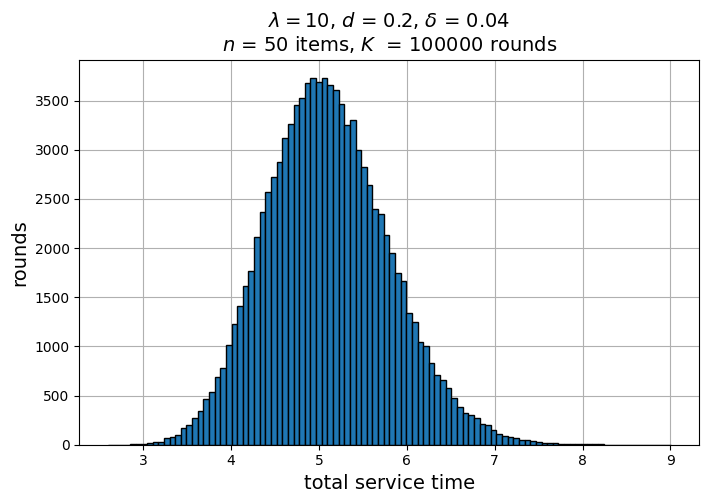

In [ ]:
#%%
kmax=np.max(maxk)
bins=np.arange(-0.5,kmax+0.5,1)
plt.figure(figsize=(8,5))
plt.hist(total_time,bins=100,density=False,zorder=2,edgecolor='k')
plt.grid()
plt.title('$\lambda = $'+str(la)+', $d$ = '+str(d)+', $\delta$ = '
          +str(delta)+'\n'+
          '$n$ = '+str(n)+' items, $K$  = '+str(K)+' rounds',fontsize=14)

plt.xlabel('total service time',fontsize=14)
plt.ylabel('rounds',fontsize=14)
plt.show()

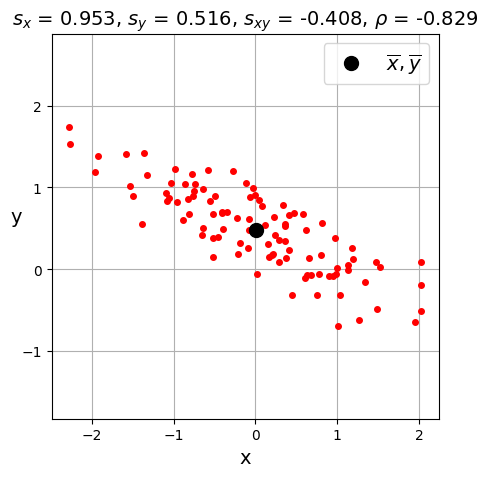

In [ ]:
#%% p.71, 2D-data

n=100 #number of points

mux=0
sigmax=1
x=np.random.normal(mux,sigmax,n) #x~N(mu,sigma^2)

#points approximately from line y=kx+b
k=-0.4
b=0.5
e=np.random.normal(0,0.3,n)  #noise
y=k*x+b+e

#points with correlation ~ 0
#muy=1
#sigmay=2
#y=np.random.normal(muy,sigmay,n)




#means and standard deviations of coordinates
mx=np.mean(x)
my=np.mean(y)
sx=np.std(x)
sy=np.std(y)
sxy=1/n*np.sum((x-mx)*(y-my)) #covariance
rho=sxy/(sx*sy) #correlation coefficient

S=np.array([[sx**2,sxy],
            [sxy,sy**2]]) #covariance matrix

#method 2
#coordinates as columns of matrix X
# X=np.zeros((2,n))
# X[0,:]=x
# X[1,:]=y
# S=np.cov(X,ddof=0) #covariance matrix
#ddof=0: delta degrees of freedom, uses standard deviations
#ddof=1: uses sample standard deviations (1/n->1/(n-1))

plt.figure(figsize=(5,5))
plt.plot(x,y,'r.',markersize=8)
plt.plot(mx,my,'ko',markersize=10,label='$\overline{x},\overline{y} $')
plt.grid()
plt.axis('equal')
plt.xlabel('x',fontsize=14)
plt.ylabel('y',fontsize=14,rotation=0)
plt.legend(fontsize=14)
plt.title('$s_x$ = {:.3f}'.format(sx)+', $s_y$ = {:.3f}'.format(sy)+
          ', $s_{{xy}}$ = {:.3f}'.format(sxy)+
          r', $\rho$ = {:.3f}'.format(rho),fontsize=14)
plt.show()

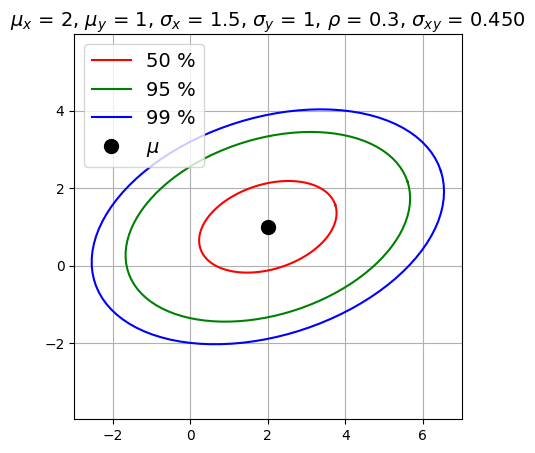

In [ ]:
#%% 2D-normal distribution, p.75

#mean
mux=2
muy=1
mu=np.array([[mux,muy]]).T #(2,1)
#standard deviations
sigmax=1.5
sigmay=1
#correlation coefficient
rho=0.3
#covariance
sigmaxy=rho*sigmax*sigmay
#covariance matrix
S=np.array([[sigmax**2,sigmaxy],
            [sigmaxy,sigmay**2]])

#coordinates of the points in ellipse
#p=1.4/6.0/9.2 ->50/95/99 %  ellipse
def ellipse2D(mu,S,p):
    vals,vect=np.linalg.eig(S) #eigenvalues  and -vectors of S)
    la1=vals[0]
    la2=vals[1]
    u=vect[:,0]
    v=vect[:,1]
    a=np.sqrt(p*la1)
    b=np.sqrt(p*la2)
    t=np.linspace(0,2*np.pi,100)
    co=np.cos(t)
    si=np.sin(t)
    x=mu[0,0]+a*co*u[0]+b*si*v[0]
    y=mu[1,0]+a*co*u[1]+b*si*v[1]
    return x,y

#ellipses
p1=1.4
x1,y1=ellipse2D(mu,S,p1) #50 %
p2=6.0
x2,y2=ellipse2D(mu,S,p2) #95 %
p3=9.2
x3,y3=ellipse2D(mu,S,p3) #99 %

plt.figure(figsize=(5,5))
plt.plot(x1,y1,'r',label='50 %')
plt.plot(x2,y2,'g',label='95 %')
plt.plot(x3,y3,'b',label='99 %')
plt.plot(mux,muy,'ko',markersize=10,label='$\mu$')
plt.grid()
plt.legend(fontsize=14)
plt.axis('equal')
plt.title('$\mu_x$ = '+str(mux)+', $\mu_y$ = '+str(muy)+
          ', $\sigma_x$ = '+str(sigmax)+', $\sigma_y$ = '+str(sigmay)+
          r', $\rho$ = '+str(rho)+
          ', $\sigma_{{xy}}$ = {:.3f}'.format(sigmaxy),fontsize=14)
plt.show()

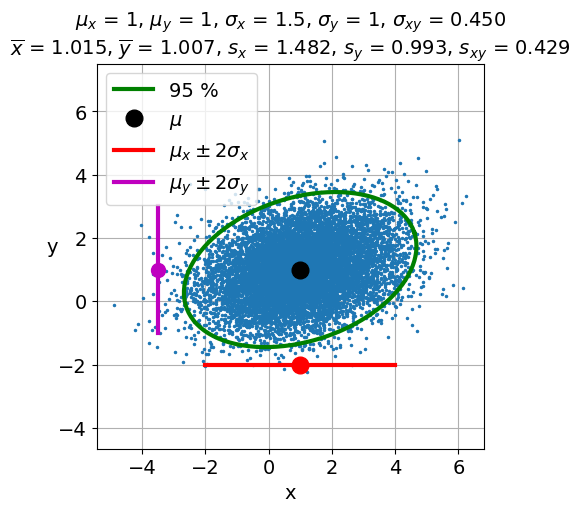

In [ ]:
#%% simulation

#mean
mux=1
muy=1
mu=np.array([[mux,muy]]).T
#standard deviations
sigmax=1.5
sigmay=1
#correlation coefficient
rho=0.3
#covariance
sigmaxy=rho*sigmax*sigmay
#covariance matrix
S=np.array([[sigmax**2,sigmaxy],
            [sigmaxy,sigmay**2]])

n=10000 #number of points

X=np.random.multivariate_normal(mu[:,0],S,n).T
#mu an 1D-array
#transpose .T -> X is (2,n)-matrix, points as columns, coordinates as rows
x=X[0,:]
y=X[1,:]

#means, standard deviations, covariance of points
m=np.mean(X,axis=1)
mx=m[0]
my=m[1]
s=np.std(X,axis=1)
sx=s[0]
sy=s[1]
sxy=1/n*np.sum((x-sx)*(y-sy))

#ellipses
p=6.0 #95 %
xe,ye=ellipse2D(mu,S,p)


xv=mux-3*sigmax
ya=muy-3*sigmay

plt.figure(figsize=(5,5))
plt.plot(x,y,'.',markersize=3)
plt.plot(xe,ye,'g',label='95 %',lw=3)#lw=linewidth
plt.plot(mux,muy,'ko',markersize=12,label='$\mu$')
plt.plot([mux-2*sigmax,mux+2*sigmax],[ya,ya],color='r',lw=3,label='$\mu_x\pm 2\sigma_x$')
plt.plot(mux,ya,'ro',markersize=12)
plt.plot([xv,xv],[muy-2*sigmay,muy+2*sigmay],color='m',lw=3,label='$\mu_y\pm 2\sigma_y$')
plt.plot(xv,muy,'mo',markersize=10)
plt.grid()
plt.legend(fontsize=14)
plt.axis('equal')
plt.xlabel('x',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('y',fontsize=14,rotation=0)
plt.title('$\mu_x$ = '+str(mux)+', $\mu_y$ = '+str(muy)+
          ', $\sigma_x$ = '+str(sigmax)+', $\sigma_y$ = '+str(sigmay)+
          ', $\sigma_{{xy}}$ = {:.3f}'.format(sigmaxy)+'\n'+
          '$\overline{{x}}$ = {:.3f}'.format(mx)+', $\overline{{y}}$ = {:.3f}'.format(my)+
          ', $s_x$ = {:.3f}'.format(sx)+', $s_y$ = {:.3f}'.format(sy)+
          ', $s_{{xy}}$ = {:.3f}'.format(sxy),fontsize=14)
plt.show()



In [ ]:
#%% fraction of points inside 95 % ellipse
from numpy.linalg import inv
Sinv=inv(S) #S^-1
test=np.zeros(n)
for k in range(n):
    Xk=X[:,k].reshape(2,1)
    testk=(Xk-mu).T@Sinv@(Xk-mu)
    test[k]=testk[0,0]

print(np.sum(test<=p2)/n)

0.9542


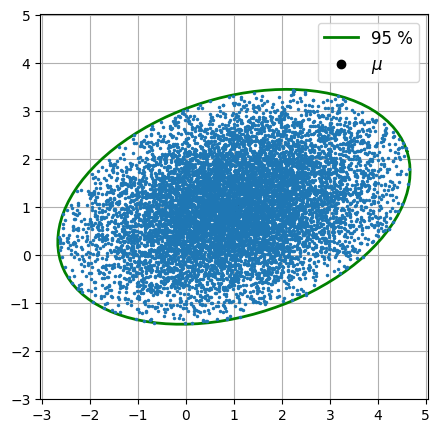

In [ ]:
#%%
plt.figure(figsize=(5,5))
plt.plot(xe,ye,'g',label='95 %',lw=2) #lw=linewidth
plt.plot(mux,muy,'ko',label='$\mu$')
plt.plot(X[0,test<=p2],X[1,test<=p2],'.',markersize=3) #points inside ellipse
plt.grid()
plt.legend(fontsize=12)
plt.axis('equal')
plt.show()

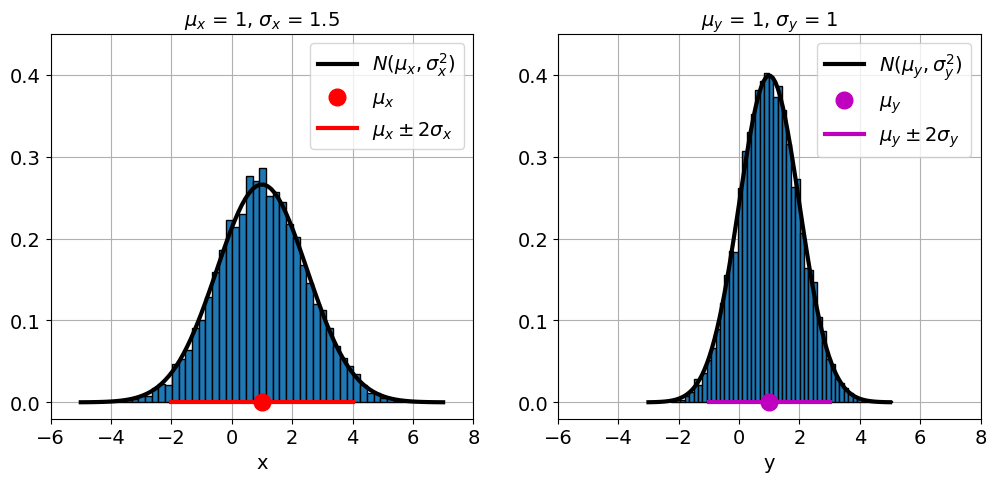

In [ ]:
#%% p.79, distribution of coordinates

#Gaussian
def gk(m,s):
    x=np.linspace(m-4*s,m+4*s,100)
    f=1/(np.sqrt(2*np.pi)*s)*np.exp(-1/2*((x-m)/s)**2)
    return x,f

xx,fx=gk(mux,sigmax)
yy,fy=gk(muy,sigmay)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(x,bins=50,density=True,edgecolor='k',zorder=2)
plt.plot(xx,fx,'k',lw=3,label='$N(\mu_x,\sigma_x^2)$')
plt.plot(mux,0,'ro',markersize=12,label='$\mu_x$')
plt.plot([mux-2*sigmax,mux+2*sigmax],[0,0],color='r',lw=3,label='$\mu_x\pm 2\sigma_x$')
plt.grid()
plt.xlabel('x',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('$\mu_x$ = '+str(mux)+
          ', $\sigma_x$ = '+str(sigmax),fontsize=14)
plt.legend(fontsize=14)
plt.xlim(-6,8)
plt.ylim(-0.02,0.45)


plt.subplot(1,2,2)
plt.hist(y,bins=50,density=True,edgecolor='k',zorder=2)
plt.plot(yy,fy,'k',lw=3,label='$N(\mu_y,\sigma_y^2)$')
plt.plot(muy,0,'mo',markersize=12,label='$\mu_y$')
plt.plot([muy-2*sigmay,muy+2*sigmay],[0,0],color='m',lw=3,label='$\mu_y\pm 2\sigma_y$')
plt.grid()
plt.xlabel('y',fontsize=14)
plt.title('$\mu_y$ = '+str(muy)+
          ', $\sigma_y$ = '+str(sigmay),fontsize=14)
plt.legend(fontsize=14,loc='upper right')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(-6,8)
plt.ylim(-0.02,0.45)
plt.show()

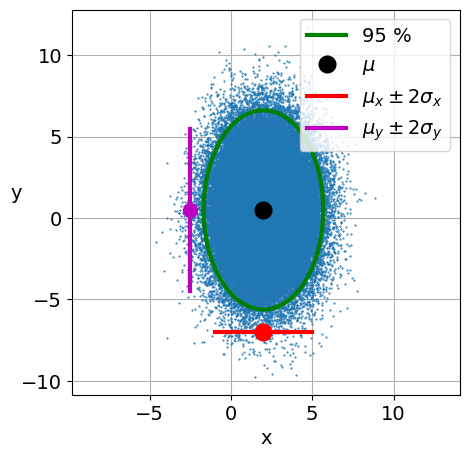

In [ ]:
#%% p.80
#coordinates x and y 1D-normally distributed
#-> X=[x;y] 2D-normally distributed
N=100000
mux=2
sigmax=1.5
muy=0.5
sigmay=2.5
x=np.random.normal(mux,sigmax,N)
y=np.random.normal(muy,sigmay,N)
#ellipses
p=6.0 #95 %
mu=np.array([[mux,muy]]).T
S=np.array([[sigmax**2,0],[0,sigmay**2]])
xe,ye=ellipse2D(mu,S,p)


xv=mux-3*sigmax
ya=muy-3*sigmay

plt.figure(figsize=(5,5))
plt.plot(x,y,'.',markersize=1)
plt.plot(xe,ye,'g',label='95 %',lw=3)#lw=linewidth
plt.plot(mux,muy,'ko',markersize=12,label='$\mu$')
plt.plot([mux-2*sigmax,mux+2*sigmax],[ya,ya],color='r',lw=3,label='$\mu_x\pm 2\sigma_x$')
plt.plot(mux,ya,'ro',markersize=12)
plt.plot([xv,xv],[muy-2*sigmay,muy+2*sigmay],color='m',lw=3,label='$\mu_y\pm 2\sigma_y$')
plt.plot(xv,muy,'mo',markersize=10)
plt.grid()
plt.legend(fontsize=14)
plt.axis('equal')
plt.xlabel('x',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('y',fontsize=14,rotation=0)
plt.show()

In [ ]:
#%% points inside the 95% ellipse
from numpy.linalg import inv
Sinv=inv(S) #S^-1
test=np.zeros(n)
X=np.vstack((x,y))
for k in range(n):
    Xk=X[:,k].reshape(2,1)
    testk=(Xk-mu).T@Sinv@(Xk-mu)
    test[k]=testk[0,0]

print(np.sum(test<=p2)/n)

0.9508
